<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>

In [274]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams


# Logistic Regression



<div class="span5 alert alert-info" style="background-color: #ffffe0;">
<p>Logistic regression is a probabilistic model that links observed binary data to a set of features.</p>

<p>Suppose that we have a set of binary (that is, taking the values 0 or 1) observations Y<sub>1</sub>....Y<sub>n</sub>, and for each observation Y<sub>i</sub> we have a vector of features X<sub>i</sub>. The logistic regression model assumes that there is some set of <b>weights</b>, <b>coefficients</b>, or <b>parameters</b> &#946;.
<br>
<p>When we <b>fit</b> a logistic regression model, we determine values for each &#946; that allows the model to best fit the <b>training data</b> we have observed. Once we do this, we can use these coefficients to make predictions about data we have not yet observed.</p>

</div>

From http://www.edwardtufte.com/tufte/ebooks, in "Visual and Statistical Thinking: 
Displays of Evidence for Making Decisions":

>On January 28, 1986, the space shuttle Challenger exploded and seven astronauts died because two rubber O-rings leaked. These rings had lost their resiliency because the shuttle was launched on a very cold day. Ambient temperatures were in the low 30s and the O-rings themselves were much colder, less than 20F.

>One day before the flight, the predicted temperature for the launch was 26F to 29F. Concerned that the rings would not seal at such a cold temperature, the engineers who designed the rocket opposed launching Challenger the next day.

But they did not make their case persuasively, and were over-ruled by NASA.

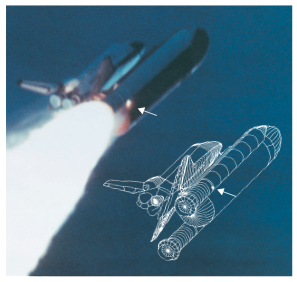

In [275]:
from IPython.display import Image as Im
from IPython.display import display
Im('./shuttle.png')

The image above shows the leak, where the O-ring failed.

We have here data on previous failures of the O-rings at various temperatures.

In [276]:
data=np.array([[float(j) for j in e.strip().split()] for e in open("chall.txt")]) # reading in from txt
data

array([[66.,  0.],
       [70.,  1.],
       [69.,  0.],
       [68.,  0.],
       [67.,  0.],
       [72.,  0.],
       [73.,  0.],
       [70.,  0.],
       [57.,  1.],
       [63.,  1.],
       [70.,  1.],
       [78.,  0.],
       [67.,  0.],
       [53.,  1.],
       [67.,  0.],
       [75.,  0.],
       [70.,  0.],
       [81.,  0.],
       [76.,  0.],
       [79.,  0.],
       [75.,  1.],
       [76.,  0.],
       [58.,  1.]])

Lets plot this data

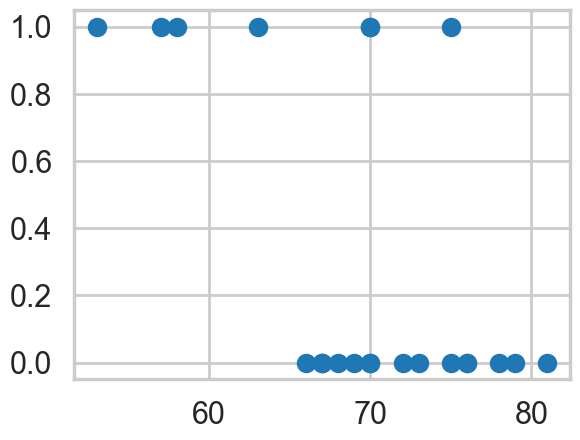

In [277]:
dat = pd.DataFrame(data, columns = ['Temp', 'Failure'])
plt.scatter(dat["Temp"],dat["Failure"])

Let's use Scikit Learn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [278]:
from sklearn.linear_model import LogisticRegression

In [279]:
model = LogisticRegression()

In [280]:
X = dat["Temp"].values
y = dat["Failure"].values
y

array([0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1.])

In [281]:
model.fit(X.reshape(-1,1),y) # reshape for scikitlearn is inline not separate

LogisticRegression()

In [282]:
model.score(X.reshape(-1,1),y) # reshape for scikitlearn is inline not separate

0.8695652173913043

In [283]:
model.intercept_

array([14.86182022])

In [284]:
model.coef_

array([[-0.22949881]])

In [285]:
x = np.linspace(50, 85, 1000) # this will create a 1000 evenly spaced values between 50-85 for x
y_pred = model.predict(x.reshape(-1,1))

In [286]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

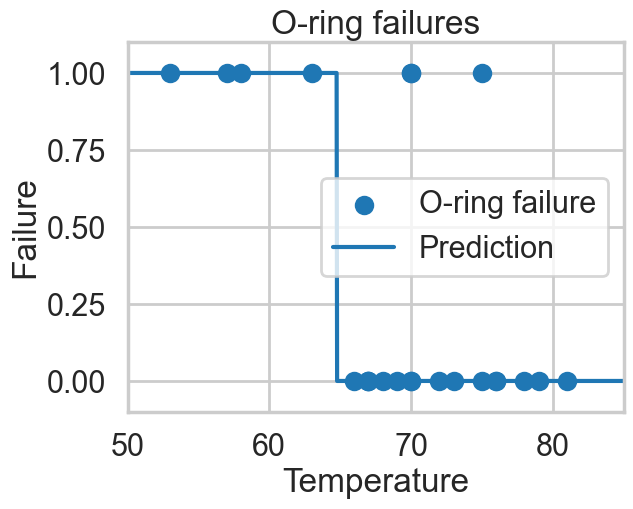

In [287]:
temps, pfail = data[:,0], data[:,1]
plt.scatter(temps, pfail,label='O-ring failure')
axes=plt.gca()
plt.xlabel('Temperature')
plt.ylabel('Failure')
plt.title('O-ring failures')

# plot fitted values
plt.plot(x, y_pred, label='Prediction')

# change limits, for a nicer plot
plt.xlim(50, 85)
plt.ylim(-0.1, 1.1)
plt.legend()

#Square wave transition from success to failure (I'd prefer to see probabilities)

In [288]:
y_predprob = model.predict_proba(x.reshape(-1,1))
y_predprob

array([[0.03270804, 0.96729196],
       [0.03296338, 0.96703662],
       [0.03322065, 0.96677935],
       ...,
       [0.99033467, 0.00966533],
       [0.99041133, 0.00958867],
       [0.99048739, 0.00951261]])

(-0.1, 1.1)

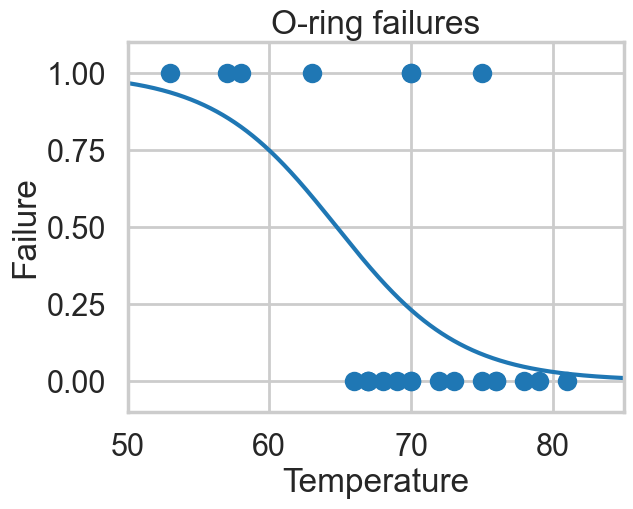

In [289]:
temps, pfail = data[:,0], data[:,1]
plt.scatter(temps, pfail)
axes=plt.gca()
plt.xlabel('Temperature')
plt.ylabel('Failure')
plt.title('O-ring failures')

# plot fitted values
plt.plot(x, y_predprob[:,1])    #y_predprob has both probability and (1-y_predprob) - so we only plot column [:,1]

# change limits, for a nicer plot
plt.xlim(50, 85)
plt.ylim(-0.1, 1.1)


# Logistic Regression: Multiple independent variables

<div class="bg-warning" style="background-color: #ffffe0;">

> > Logistic Regression Assumptions

>Binary logistic regression requires the dependent variable to be binary.
>For a binary regression, the dependent variable should represent the desired outcome.
>Only the meaningful variables should be included.
>The independent variables should be independent of each other. That is, the model should have little >or no multicollinearity.
>Logistic regression requires quite large sample sizes.
</div>

We will be using the Titanic dataset from kaggle, which is a collection of data points, including the age, gender, ticket price, etc.., of all the passengers aboard the Titanic. The data set has 891 rows and 12 columns. The goal is to see if we can predict whether any given passenger will die or survive. Hopefully you can see why logistic regression is a fitting model for this problem.

### Task 1
Read in the data as usual and view the first 5 terms, try to understand the contents of each column - think about which columns may be useful and which may not be useful.

In [290]:
df = pd.read_csv("titanic_dataset.csv")

In [291]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.7000,C101,S
1,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
2,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
3,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
4,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [292]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.275811
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.743772
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [293]:
df.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           0
cabin       1014
embarked       0
dtype: int64

### Task 2
The Columns passengerID, Name and ticket probably are not going to affect a person's chance of survival. Additionally the column cabin has a lot of null values so we won't include that.

The column Age also has Null values, for this column we will just replace them with either the mean or the median

The column survived is going to be our dependent variable, it's either 1 or 0. 

Create the X and y variables that we will be using

In [294]:
df['age'] = df['age'].fillna(df['age'].median()) # fill missing values (NaNs) in the 'age' using the median age of the dataset

In [295]:
y = df["survived"] # target feature
X = df[["pclass","age","sex","sibsp","parch","fare","embarked"]] # possible training features

In [296]:
X.head()

,pclass,age,sex,sibsp,parch,fare,embarked
0,1,55.0,female,2,0,25.7000,S
1,1,49.0,female,0,0,25.9292,S
2,1,48.0,female,0,0,25.9292,S
3,1,19.0,female,0,2,26.2833,S
4,1,58.0,female,0,0,26.5500,S


The sex column is categorical so we need to do some preprocessing to convert it

As long as you have X built correctly the following will encode the data, i.e. make male/female 1 and 0 (or 0 and 1) respectively

In [297]:
# convert categorical data into numerical form 
    #  because most machine learning algorithms require numerical input. 
from sklearn import preprocessing # import preprocessing module
le_sex = preprocessing.LabelEncoder() #initiate label encoder
le_sex.fit(X['sex']) #Fit the encoder to the 'sex' column to find unique values
sex = le_sex.transform(X['sex'])# assign numerical values to unique categorical values (Female, male -> 0,1)
X = X.drop(['sex'], axis = 1)#drop original "sex" column
X['sex'] = sex #Add the encoded 'sex' column back to the DataFrame
print("unique values:",le_sex.classes_) #check what were encoded
print("encoded: ",X['sex'].unique())
X


unique values: ['female' 'male']
encoded:  [0 1]


,pclass,age,sibsp,parch,fare,embarked,sex
0,1,55.0,2,0,25.7000,S,0
1,1,49.0,0,0,25.9292,S,0
2,1,48.0,0,0,25.9292,S,0
3,1,19.0,0,2,26.2833,S,0
4,1,58.0,0,0,26.5500,S,0
...,...,...,...,...,...,...,...
1304,3,14.5,8,2,69.5500,S,1
1305,3,28.0,8,2,69.5500,S,1
1306,3,28.0,8,2,69.5500,S,1
1307,3,28.0,8,2,69.5500,S,1


You need to do the similar thing for the column <b>Embarked</b>

First let's remove the nan entries

In [298]:
# Count each unique value in the 'embarked' column
embarked_counts = X["embarked"].value_counts()
print(embarked_counts)


embarked
S    916
C    270
Q    123
Name: count, dtype: int64


In [299]:
X["embarked"].unique() # this has more than one unique categorical value

array(['S', 'C', 'Q'], dtype=object)

There are 3 options here. LabelEncoder would give a ranking to each of them 0, 1, 2 based on alphabetical order

We probably don't want this. We could use OneHotEncoder() this time to make things better, but for now, just use LabelEncoder

read <a href="https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/">This Article</a> to see more

One-Hot Encoding is the process of creating dummy variables.

>OneHotEncoder converts categorical variables into a numerical format by creating binary columns for each category. Each category is represented as a vector where one position is 1 (indicating the presence of that category) and all others are 0.

**Example:**  
For the category "color" with values `["red", "green", "blue"]`, it would become:

| red | green | blue |
|-----|-------|------|
|  1  |   0   |  0   |  (for "red")  |
|  0  |   1   |  0   |  (for "green")|
|  0  |   0   |  1   |  (for "blue") |


I've included this example of OneHotEncoder but have commented it out

### Start of onehotencoder

In [300]:
le_embark = preprocessing.OneHotEncoder() #preprocessing.OneHotEncoder(sparse=False)  - (sparse=False) gives an error
le_embark.fit(X["embarked"].values.reshape(-1,1))
embarked = le_embark.transform(X["embarked"].values.reshape(-1,1))
embarked

<1309x3 sparse matrix of type '<class 'numpy.float64'>'
	with 1309 stored elements in Compressed Sparse Row format>

In [301]:
embarked.shape

(1309, 3)

3 variables, one for each S, C, Q

In [302]:
embarked[:,2]

<1309x1 sparse matrix of type '<class 'numpy.float64'>'
	with 916 stored elements in Compressed Sparse Row format>

Get rid of the original Embarked

Now put in the new columns

There's probably a better way but this will work

In [303]:
#preprocessing.OneHotEncoder(sparse=False)  - (sparse=False) gives an error so converted to dense array below 
# so it can be added to the dataframe
embarked = le_embark.transform(X["embarked"].values.reshape(-1, 1)).toarray()
#drop OG embarked
X = X.drop(["embarked"], axis = 1)
#mount unique values as separate columns
X["embarkC"] = embarked[:,0]
X["embarkQ"] = embarked[:,1]
X["embarkS"] = embarked[:,2]

In [304]:
X

,pclass,age,sibsp,parch,fare,sex,embarkC,embarkQ,embarkS
0,1,55.0,2,0,25.7000,0,0.0,0.0,1.0
1,1,49.0,0,0,25.9292,0,0.0,0.0,1.0
2,1,48.0,0,0,25.9292,0,0.0,0.0,1.0
3,1,19.0,0,2,26.2833,0,0.0,0.0,1.0
4,1,58.0,0,0,26.5500,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1304,3,14.5,8,2,69.5500,1,0.0,0.0,1.0
1305,3,28.0,8,2,69.5500,1,0.0,0.0,1.0
1306,3,28.0,8,2,69.5500,1,0.0,0.0,1.0
1307,3,28.0,8,2,69.5500,1,0.0,0.0,1.0


### End of OneHotEncoder

It's not advised to do a LabelEncoder for this type of data, but it might do ok, and we'll use it now for simplicity

In [305]:
# already used OneHotEncoder

#It's not advised to do a LabelEncoder for this type of data, 
# but it might do ok, and we'll use it now for simplicity
'''le_embark = preprocessing.LabelEncoder()
le_embark.fit(X["embarked"])
embarked = le_embark.transform(X["embarked"])
X = X.drop(["embarked"], axis = 1)
X["embarked"] = embarked
X'''

'le_embark = preprocessing.LabelEncoder()\nle_embark.fit(X["embarked"])\nembarked = le_embark.transform(X["embarked"])\nX = X.drop(["embarked"], axis = 1)\nX["embarked"] = embarked\nX'

### Task 3
Do a train_test_split and build the model using sklearn

In [306]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [307]:
titanic_lm = LogisticRegression #initiate model

In [308]:
titanic_lm = LogisticRegression(max_iter=1000) # initiate model with max iteration set to 1000

In [309]:
titanic_lm.fit(X_train, y_train) #fit training data

LogisticRegression(max_iter=1000)

In [310]:
y_train_predicted = titanic_lm.predict(X_train) #Predicted class labels (0 or 1) for the training data.
#What It Does: gets the predicted survival results (0 or 1) for the training data.
#Result: y_train_predicted will show if each passenger is predicted to survive (1) or not (0).

y_train_predprob = titanic_lm.predict_proba(X_train)# Predicted probabilities for each class for the training data.
#What It Does: finds out the probabilities of survival for each passenger.
#Result: y_train_predprob gives a list of probabilities for each passenger, showing how likely they are to survive (like 70% chance or 30% chance).


In [311]:
titanic_lm.score(X_train,y_train) #traioning score

0.7981651376146789

We get a score of 80% accurate in predicting whether someone survives or not

However, this is on the training set, we really should use a different set to score our model, one that it has not seen before

Make sure you keep your titanic_lm model, do not overwrite it in the next task

### Task 4 
Let's use the model to make predictions with new information

In [312]:
y_test_predicted = titanic_lm.predict(X_test)
y_test_predprob = titanic_lm.predict_proba(X_test)

In [313]:
titanic_lm.score(X_test, y_test) #test score

0.7957317073170732

Test score is very similar to training score

### Task 5: Join new predictions and probabilities into original dataset

In [314]:
y_predicted = titanic_lm.predict(X)
y_predprob = titanic_lm.predict_proba(X)

In [315]:
df['survive_predicted'] = y_predicted
df['survive_probability'] = y_predprob[:,1]

In [316]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survive_predicted,survive_probability
0,1,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.7000,C101,S,1,0.708282
1,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,1,0.837879
2,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S,1,0.842176
3,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S,1,0.920402
4,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1,0.794996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.5500,NaN,S,0,0.015599
1305,3,0,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.5500,NaN,S,0,0.010185
1306,3,0,"Sage, Mr. Frederick",male,28.0,8,2,CA. 2343,69.5500,NaN,S,0,0.010185
1307,3,0,"Sage, Mr. George John Jr",male,28.0,8,2,CA. 2343,69.5500,NaN,S,0,0.010185


We can see what our model predicts for the new data, additionally we've added in the probabilities for more information

Alternative tutorial: https://www.youtube.com/watch?v=in6PDZXkqrw